In [1]:
!pip install git+https://github.com/openai/CLIP.git
!pip install torch torchvision


  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-o113xugf
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-o113xugf
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.0/43.0 kB 1.0 MB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369490 sha256=1540ecf1d085fc004c282a51c6dcf16235aa938ffab8d3a2531c61dd3ef94200
  Stored in directory: /tmp/pip-ephem-wheel-cache-ilnu40go/wheels/35/3e/df/3d24cbfb3b6a06f17a2bfd7d1138900d4365d9028aa8f6e92f
Successfully built clip


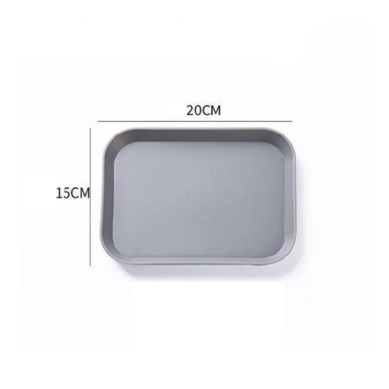

Similarity score for 'What is the width of the object? Options: centimetre, foot, millimetre, metre, inch, yard': 0.24560546875
Similarity score: 0.2279052734375


In [5]:
import clip
import torch
from PIL import Image
import requests
from io import BytesIO

# Load the model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

# Function to load and preprocess image
def load_image(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content)).convert("RGB")
    return preprocess(img).unsqueeze(0).to(device)

# Function to encode text
def encode_text(text):
    return clip.tokenize([text]).to(device)


import clip
import torch
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# Load the model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

# Function to load and preprocess image
def load_image(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content)).convert("RGB")
    return preprocess(img).unsqueeze(0).to(device)

# Function to encode text
def encode_text(text):
    return clip.tokenize([text]).to(device)

# Function to display image
def show_image(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Example image URL
image_url = "https://m.media-amazon.com/images/I/41-NCxNuBxL.jpg"

# Load and display image
show_image(image_url)
image = load_image(image_url)

# Define possible attributes
attributes = {
    "width": ["centimetre", "foot", "millimetre", "metre", "inch", "yard"],
    "depth": ["centimetre", "foot", "millimetre", "metre", "inch", "yard"],
    "height": ["centimetre", "foot", "millimetre", "metre", "inch", "yard"],
    "item_weight": ["milligram", "kilogram", "microgram", "gram", "ounce", "ton", "pound"],
    "maximum_weight_recommendation": ["milligram", "kilogram", "microgram", "gram", "ounce", "ton", "pound"],
    "voltage": ["millivolt", "kilovolt", "volt"],
    "wattage": ["kilowatt", "watt"],
    "item_volume": ["cubic foot", "microlitre", "cup", "fluid ounce", "centilitre", "imperial gallon", "pint", "decilitre", "litre", "millilitre", "quart", "cubic inch", "gallon"]
}

# Function to process user input
def query_image(attribute):
    if attribute not in attributes:
        print("Attribute not found.")
        return
    options = attributes[attribute]
    
    # Create a prompt with the available options
    prompts = [f"What is the {attribute} of the object? Options: {', '.join(options)}"]
    
    # Encode prompts
    prompt_features = [model.encode_text(encode_text(prompt)) for prompt in prompts]
    
    # Compare with the image
    with torch.no_grad():
        image_features = model.encode_image(image)
        similarities = [torch.cosine_similarity(image_features, prompt_feature) for prompt_feature in prompt_features]
        
    # Display results
    for i, similarity in enumerate(similarities):
        print(f"Similarity score for '{prompts[i]}': {similarity.item()}")

# Ask user for attribute
attribute = input("Enter the attribute you want to find (width, depth, height, item_weight, maximum_weight_recommendation, voltage, wattage, item_volume): ")
query_image(attribute)


# Example usage
image_url = "https://m.media-amazon.com/images/I/41-NCxNuBxL.jpg"  # Replace with an actual image URL
image = load_image(image_url)
text = "A description of the image"

# Get features
with torch.no_grad():
    image_features = model.encode_image(image)
    text_features = model.encode_text(encode_text(text))

# Calculate similarity
similarity = torch.cosine_similarity(image_features, text_features)
print(f"Similarity score: {similarity.item()}")


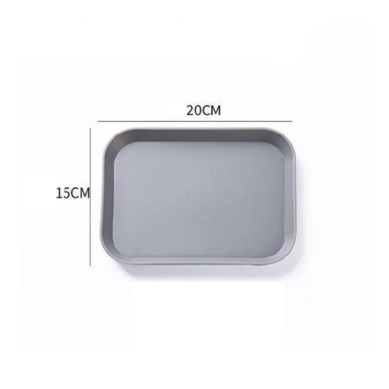

In [3]:
import matplotlib.pyplot as plt

def show_image(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

show_image(image_url)
